# Assignment #2 - Classification

<font color="red"> <b> Due: Oct 23 (Friday) 11:00 pm </b> </font>

<font color="blue"> Sreekar Nedunuri </font>

# I. Introduction

The objective of this assignment is to implement classification models like Pocket Algorithm, QDA, LDA and Logistic regression. The challenge here is to apply these models to our data.

We are using numpy for array manipulation, pandas is used for data manipulation and analysis, sklearn is used to build machine learning models. Matplotlib and seaborn for visualization

Goal is to classify the data with classification methods and draw decision boundaries.

The classification methods which we use are:

1)Pocket Algorithm  
2)Linear Discriminant Analysis  
3)Quadratic Discriminant Analysis  
4)Logistic Regression 

# II. Data

This is Electrical Grid Stability Simulated Data Set from UCI Machine Learning Repository where we identify if data is stable or unstable based on few attirbutes like power consumption and user
 Attribute Information:

11 predictive attributes, 1 non-predictive(p1), 2 goal fields:
1. tau[x]: reaction time of participant (real from the range [0.5,10]s). Tau1 - the value for electricity producer.
2. p[x]: nominal power consumed(negative)/produced(positive)(real). For consumers from the range [-0.5,-2]s^-2; p1 = abs(p2 + p3 + p4)
3. g[x]: coefficient (gamma) proportional to price elasticity (real from the range [0.05,1]s^-1). g1 - the value for electricity producer.
4. stab: the maximal real part of the characteristic equation root (if positive - the system is linearly unstable)(real)
5. stabf: the stability label of the system (categorical: stable/unstable)

The local stability analysis of the 4-node star system (electricity producer is in the center) implementing Decentral Smart Grid Control concept.

## Importing libraries and Reading the Data

We can import the necessary libraries needed for this assignment and since this is a csv we can use pandas built in function read_csv to read the dataset and use the head() to view the data. By default it displays first five entries.

In [717]:
# Importing necessary libraries for assignment
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [718]:
# Reading csv data using pandas
energyy = pd.read_csv("Data_for_UCI_named.csv")
energyy.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


## Pre Processing of data

We have read the data from .csv file and now we need to check the data for nulls or values which are not intended to be for the respective attribute.

We can use the .info() to check the null value counts and check for consistency in data types. We even need to convert any text data into numerical data and look at attributes to identify intuitively which attribute is not needed for the assignment.

After looking at the data, we can conclude that stabf attribute can be dropped since it object and is classification categorical data which is not needed for this regression data and storing stab field which is the target attribute in target variable

In [719]:
# Checking if the data has non null values
energyy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [720]:
energy = energyy.drop('stab',axis=1)
target = energyy['stabf']
energy

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,unstable


In [721]:
target

0       unstable
1         stable
2       unstable
3       unstable
4       unstable
          ...   
9995    unstable
9996      stable
9997      stable
9998    unstable
9999    unstable
Name: stabf, Length: 10000, dtype: object

## Normalization and Standardization

First we need to Check the minimum and maximum value for each attribute so as to see if data has to be normalized or not.

Here, we check how distributed are the minimum and maximum values and how far they are separated, if they are separated apart from 0 and 1, we need to normalize the attribute, I used Min Max method of normalization. 

First i described the data and then applied min max to the attributes

We will use sklearn inbuilt class MinMaxScaler to normalize and then convert into data frame since MinMax return numpy nd array and then converting into dataframe energy_df.

In [722]:
# Checking the minimum and maximum value for each attribute so as to see if data has to be normalized or not
energy.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930


In [723]:
## Since minimum and max values are separated, we need to normalize it to stabilize.
from sklearn.preprocessing import MinMaxScaler
energy_numerical = energy[['tau1','tau2','tau3','tau4','p1','p2','p3','p4','g1','g2','g3','g4']]
norm = MinMaxScaler().fit(energy_numerical)
energy_norm=norm.transform(energy_numerical)
energy_norm

array([[0.258801  , 0.2715607 , 0.82961551, ..., 0.85222919, 0.88153113,
        0.95589431],
       [0.92679272, 0.46342358, 0.26811698, ..., 0.85521477, 0.539078  ,
        0.77032342],
       [0.89179939, 0.87879525, 0.26800518, ..., 0.75443962, 0.83100004,
        0.06297995],
       ...,
       [0.19615798, 0.24652253, 0.87123881, ..., 0.98585209, 0.10446344,
        0.1010163 ],
       [0.9612621 , 0.36782825, 0.23753691, ..., 0.56585897, 0.88329277,
        0.8088868 ],
       [0.63479724, 0.66124738, 0.40520519, ..., 0.47941064, 0.34603379,
        0.93967879]])

In [724]:
## Converting into DataFrame and viewing the data
energy_df = pd.DataFrame(energy_norm)
energy_df.columns = energy_numerical.columns
energy_df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.499986,0.500001,0.499988,0.500004,0.506188,0.499999,0.500006,0.499984,0.500028,0.500002,0.499982,0.500022
std,0.288730,0.288699,0.288730,0.288721,0.175663,0.288732,0.288715,0.288709,0.288712,0.288722,0.288711,0.288719
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249940,0.250008,0.250007,0.249972,0.382012,0.250029,0.249968,0.249994,0.250032,0.250027,0.249977,0.249990
50%,0.499987,0.499999,0.499985,0.499976,0.506428,0.500022,0.500023,0.499979,0.500038,0.500005,0.499997,0.500024
75%,0.749988,0.749998,0.750017,0.750014,0.630532,0.750051,0.749998,0.749957,0.749979,0.750020,0.749937,0.749977
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [725]:
from sklearn import preprocessing

text = preprocessing.LabelEncoder()
energy['stabf'] = text.fit_transform(energy['stabf'])
energy

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,1
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,0
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,0
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,1


In [726]:
target = energy['stabf']
target

0       1
1       0
2       1
3       1
4       1
       ..
9995    1
9996    0
9997    0
9998    1
9999    1
Name: stabf, Length: 10000, dtype: int32

In [727]:
energy.p1.sum()

37499.9995793617

In [728]:
energy.columns

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4', 'stabf'],
      dtype='object')

In [729]:
ev = {}
for cols in energy.columns:
    ev[cols] = energy[cols].sum()
col = list(ev.keys())
sum = list(ev.values())

en = pd.DataFrame.from_dict({'Attributes':col,'sum':sum})
en

,Attributes,sum
0,tau1,52499.999306
1,tau2,52500.010220
2,tau3,52500.035242
3,tau4,52499.970644
4,p1,37499.999579
5,p2,-12500.004574
6,p3,-12499.997444
7,p4,-12499.997560
8,g1,5249.997888
9,g2,5250.002584


## Plots for Understanding or Analysis

<Figure size 1440x720 with 0 Axes>

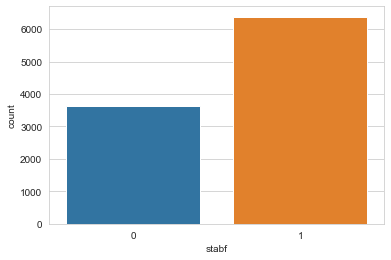

<Figure size 1440x720 with 0 Axes>

In [730]:
import matplotlib.pyplot as plt
sns.countplot(x="stabf", data=energy)
plt.figure(figsize=(20,10))

#### 1. The above plot helps us understand number of stable and unstable connections
1- Unstable
0- Stable

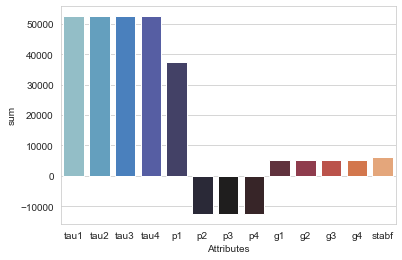

In [731]:
import seaborn as sns
sns.barplot(x='Attributes',y='sum',data=en,palette='icefire')
plt.show()

#### 2. In above plot As you can see energy is negatively consumed for p2,p3 and p4, as per data logic we are adding p2,p3,p4 to get p1. These are the sum of the attributes

F:\sreekar\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 1.0, 'abs(p2 + p3 + p4)')

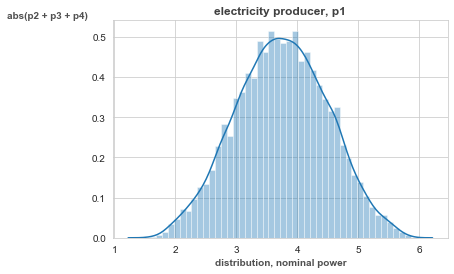

In [732]:
sns.set_style("whitegrid")
sns.distplot(energy['p1'])
plt.title("electricity producer, p1", fontweight='bold', color='#404040')
plt.xlabel('distribution, nominal power', fontweight='bold', color='#505050')
plt.ylabel('abs(p2 + p3 + p4)', color='#505050', rotation=0, fontweight='bold', horizontalalignment='right', y=1.0)


#### 3. In above plot we have distribution of nominal power and the sum of p2,p3,p4 to identify the distribution of the data, we can notice that data is distributed in between 2 and 6

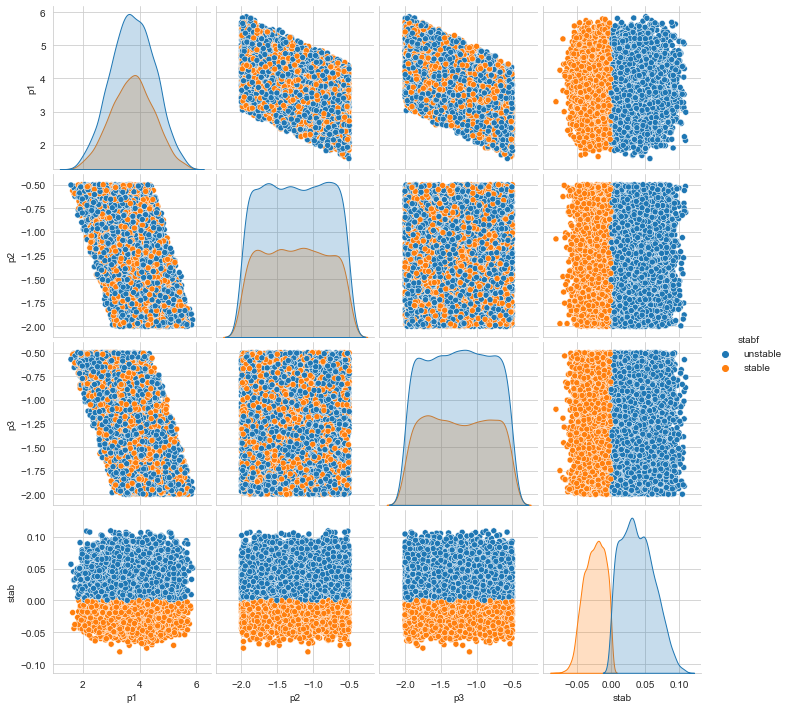

In [733]:
sns.pairplot(energyy[['p1','p2','p3','stab','stabf']],diag_kind='kde',hue='stabf')

#### 4. In above plots we can observe how stable and unstable data are correlated, why consumption of power is negatively impacted.

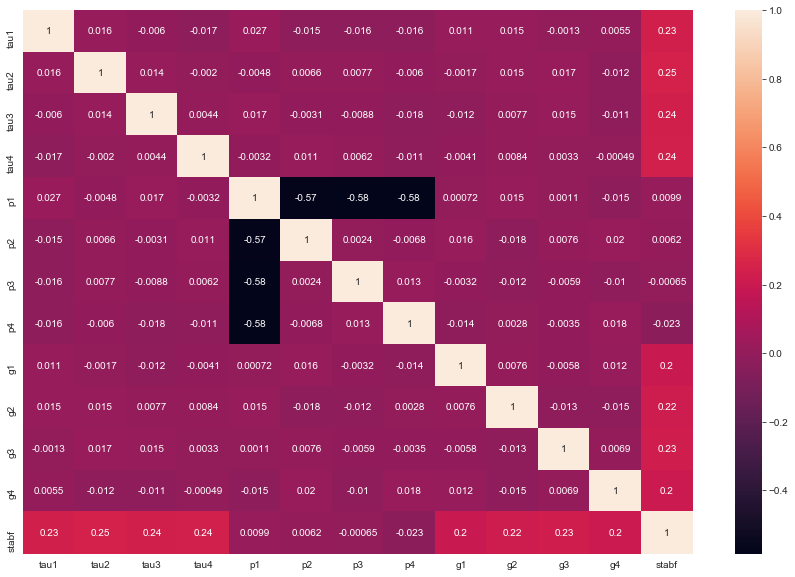

In [734]:
plt.figure(figsize=(15,10))
sns.heatmap(energy.corr(),annot=True)

#### 5. Above plot shows correlation between all the input attributes

## Preliminary Observations
Predictive features:

'tau1' to 'tau4': the reaction time of each network participant, a real value within the range 0.5 to 10 ('tau1' corresponds to the supplier node, 'tau2' to 'tau4' to the consumer nodes);
'p1' to 'p4': nominal power produced (positive) or consumed (negative) by each network participant, a real value within the range -2.0 to -0.5 for consumers ('p2' to 'p4'). As the total power consumed equals the total power generated, p1 (supplier node) = - (p2 + p3 + p4);
'g1' to 'g4': price elasticity coefficient for each network participant, a real value within the range 0.05 to 1.00 ('g1' corresponds to the supplier node, 'g2' to 'g4' to the consumer nodes; 'g' stands for 'gamma');
Dependent variables:

'stab': the maximum real part of the characteristic differentia equation root (if positive, the system is linearly unstable; if negative, linearly stable);
'stabf': a categorical (binary) label ('stable' or 'unstable').
As there is a direct relationship between 'stab' and 'stabf' ('stabf' = 'stable' if 'stab' <= 0, 'unstable' otherwise), 'stab' will be dropped and 'stabf' will remain as the sole dependent variable.

There are no missing values. Also, all features are originally numerical, no feature coding is required. Such dataset properties allow for a direct jump to machine modeling without the need of data preprocessing or feature engineering.


Plot 1 shows there are many unstable connections based on the input data.

Plot 2 determines the energy consumption, it can be found that energy is negatively consumed for p2,p3 and p4, as per data logic we are adding p2,p3,p4 to get p1. These are the sum of the attributes.

Plot 3 I'm trying to determine distribution of the data, we have distribution of nominal power and the sum of p2,p3,p4 to identify the distribution of the data, we can notice that data is distributed in between 2 and 6.

Plot 4 trying to observe how both stable and unstable data are correlated and why power is negatively impacted.

Plot 5 I'm trying to show the correlation of all the input attributes, how they are related.


# III. Method


### Summary for Different Models

### Pocket Algorithm:

This algorithm is used for supervised learning  binary classifier models. A binary classifier model decides if an input belongs to specified class. In this algorithm, weights are immediately applied to a pair in the training set, and subsequently updated, rather than waiting until all pairs in the training set have undergone these steps. this algorithm keeps the best result seen so far in its pocket (that is why it is called Pocket Learning Algorithm). A single perceptron is a linear model that applies a step function on the linear output. For classification, it iterate over the training examples, and update the weights in a way that would result in correct classification.

$$
w^{(k+1)} = w^{(k)} + \alpha t_i x_i
$$
where $\alpha$ is learning rate.<br>

It uses a simple method to compute convergence, it updates and stores best convergence after every iteration. It uses perceptron algorithm. A single perceptron is a linear model that applies a step function on the linear output. 
For classification, it iterate over the training examples, and update the weights in a way that would result in correct classification. 



<br><br>
### QDA:

Quadratic classifier is statistical classifier that uses a quadratic decision surface to separate measurements of two or more classes of objects or events. It is a more general version of the linear classifier.
It assumes that the measurements from each class are normally distributed. Co-variance of classes are not identical here.

In QDA, we need to estimate Σk for each class k∈{1,…,K} rather than assuming Σk=Σ as in LDA. The discriminant function of LDA is quadratic in x:

$$
P(T = +1 \mid x) > P(T = -1 \mid x).
$$
We can define the discriminant function $\delta_k(x)$ as

$$
\delta_k(x) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (x - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (x - \boldsymbol\mu_k) + \ln P(T = k). 
$$


<br><br>
### LDA:

LDA is a classification and dimensionality reduction technique, which can be interpreted from two perspectives. The first is interpretation is probabilistic and the second, more procedure interpretation, is due to Fisher. The first interpretation is useful for understanding the assumptions of LDA. The second interpretation allows for a better understanding on how LDA performs dimensionality reduction.

LDA assumes that the data are Gaussian. More specifically, it assumes that all classes share the same covariance matrix.
LDA finds linear decision boundaries in a K−1 dimensional subspace. As such, it is not suited if there are higher-order interactions between the independent variables. We can define LDA as:

$$
\delta_k(x) = x^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_k -\frac{1}{2} \boldsymbol\mu_k^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_k + \ln P(T = k).
$$


<br><br>
### Logistic Regression:

Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes. Mathematically, a logistic regression model predicts P(Y=1) as a function of X.


$$
\kappa = f(x ; w) = X w.
$$

Since $P(T=k \mid x)$ is probability function, it determines the probability law that: 

- the outputs are non-negative,

- the integral of the probability is one. 

Taking the softmax function and taking the derivative.
Using the gradient, 

$$
w_j \leftarrow w_j + \alpha \sum_{n=1}^{N} \Big( t_{n,j} - g_j(x_n)\Big) x_n.
$$

Converting the summation into matrix calculation,

$$
w_j \leftarrow w_j + \alpha X^\top \Big(  t_{*,j} - g_j(X)\Big).
$$

<br><br>

### A. Super Classs Definition

We first define the super class for classification algorithms. You only need to complete the normalize() method. You don't need to modify anything else. 

In [735]:
import numpy as np
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X - self.meanX) / self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract functions ############################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass 

## Explanation of Code

BaseModel class has been provided with two abstract methods

-train()

-use()

Here these methods are just declared but not implemented

Classifier class extends BaseModel with three functions:

-normalize()

This will standardize each input variable by subtracting its mean and dividing by its standard deviation. Subtracting the mean typically improves the interpretation of main effects in the presence of interactions, and dividing by the standard deviation puts all predictors on a common scale.

_check_matrix() will check if passed input matrix is 2D then we will add_ones if the data array is not in shape and this would fit the data better.

If the shape is not as per expectation, then exception is being raised.

### B. Pocket Algorithm


In [736]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [737]:
class Pocket(Classifier):
    def __init__(self,alpha):
        Classifier.__init__(self)
        self.alpha = alpha
    
    def compare(self,X, T, w, wp):
        y = np.sign(X @ w)
        yp = np.sign(X @ wp)
        
        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1
    
    def train(self,X,T):
        maxiter = 7
        self.w = np.zeros(X.shape[1])
        self.w_pocket = copy(self.w)
        N = X.shape[0]

        for i in range(maxiter):
            converged = True
            print(i)
            for k in range(N):
                
                y = self.w @ X[k]
                if np.sign(y) != np.sign(T[k]):
                    self.w += self.alpha * T[k] * X[k]
                    converged = False
                    ##### additional for pocket algorithm 
                    if self.compare(X, T, self.w, self.w_pocket) > 0:
                        self.w_pocket[:] = self.w[:]
                        
            if converged:
                print("converged at ", i)
                break
        print("End of training: ", i)
    
    def use(self,X):
        return (X@self.w_pocket)

## Explanation of Code

Here Pocket Class inherits the Classifier class.
Now we define the implementation of two abstract methods here which are

-train()

-use() 

Here, a method is defined compare() which is used to compare the weights.

The train() method is used to train the data. We first initialize the weights to zero and update w_pocket, We are using maxiter which is the maximum number of iterations and alpha which is the learning rate.<br>

The use() method will use the test data to predict the target value.

### C. QDA

In [738]:
class QDA(Classifier):
    def __init__(self):
        Classifier.__init__(self)
        
    def qda_sreekar(self,X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        diffv = np.asarray(X - mu)
        return -0.5  * np.log(np.linalg.det(sigma)) \
            - 0.5 * np.sum(diffv @ sigma_inv * diffv, axis=1) \
            + np.log(prior)
    
    
    def train(self,X1,X2):
        X1=pd.DataFrame(X1)
        X2=pd.DataFrame(X2)
        N1 = X1.shape[0]
        N2 = X2.shape[0]
        self.mu1 = np.mean(X1, 0)
        self.mu2 = np.mean(X2,0)
        
        self.sigma1 = np.cov(X1.T)
        self.sigma2 = np.cov(X2.T)
        
        self.prior1 = N1/(N1+N2)
        self.prior2 = N2/(N1+N2)
        
    def use(self,X):
        X = self.normalize(X)
        d1 = self.qda_sreekar(X,np.matrix(self.mu1),self.sigma1,self.prior1)
        d2 = self.qda_sreekar(X,np.matrix(self.mu2),self.sigma2,self.prior2)
        return d1,d2

## Explanation of Code

Here QDA_sreekar class inherits the Classifier class along with the abstract functions:

-train() 

-use()

The function returns the discriminant value.

The train() method has arguments or inputs as X1,X2. We are first converting them to dataframe and storing the shapes in two variables N1 and N2 and computing mean and co-variance. We will compute the discriminant on test data. We normalize X and calculate values of d1 and d2 which will help in predicting 0 and 1.
The use() method will use the test data to return the prediction.
It assumes that the measurements from each class are normally distributed. Co-variance of classes are not identical here.

### D. LDA

In [739]:
class LDA(Classifier):
    def __init__(self):
        Classifier.__init__(self)
    
    def LDA_sreekar(self,X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        return np.sum((X @ sigma_inv) * mu \
                - 0.5 * (mu @ sigma_inv) * mu, axis=1) \
                + np.log(prior)
    
    
    def train(self,X1,X2):
              
        N1 = X1.shape[0]
        N2 = X2.shape[0]
        self.mu1 = np.mean(X1, 0)
        self.mu2 = np.mean(X2,0)
        
        X = np.vstack((X1,X2))
        self.sigma = np.cov(X.T)
        
        self.prior1 = N1/(N1+N2)
        self.prior2 = N2/(N1+N2)
    
    def use(self,X):
        X = self.normalize(X)
        d1 = self.LDA_sreekar(X,self.mu1,self.sigma,self.prior1)
        d2 = self.LDA_sreekar(X,self.mu2,self.sigma,self.prior2)
        return d1,d2

## Explanation of Code

Here LDA_sreekar class inherits the Classifier class along with the abstract functions:

-train() 

-use()

The function returns the discriminant value.

The train() method has arguments or inputs as X1,X2. We are first converting them to dataframe and storing the shapes in two variables N1 and N2 and computing mean and co-variance. We will compute the discriminant on test data. We normalize X and calculate values of d1 and d2 which will help in predicting 0 and 1.
These statistical properties are estimated and plugged into the LDA equation to make predictions. These are the model values that you would save to file for your model
The use() method will use the test data to return the prediction.


### E. Logistic Regression

In [740]:
class LogReg(Classifier):
    def __init__(self,alpha):
        Classifier.__init__(self)
        self.alpha = alpha
    
    def softmax(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z)
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))
    
    def g(self,X, w):
        return self.softmax(X @ w)
    
    def train(self, X, T):
        X = self.normalize(X)
        N = X.shape[0]
        D = X.shape[1]
        M = len(np.unique(T))
        self.w = np.zeros((D+1, M))
        niter = 1000
        X = self.add_ones(X)
        a=(np.ones((T.shape[0], 1)))
        b=a[:,0]==1
        T=np.asmatrix(T).T
        T=np.hstack((T,a))
        T[:,1]=T[:,0]
        (T[:,1])[T[:,1]==0]=1
        (T[:,0])[T[:,0]==1]=0
        
        
        for step in range(niter):
            ys = self.g(X,self.w)
            self.w += self.alpha * X.T @ (T - ys)
    
    
    def use(self,X):
        Xn=self.normalize(X)
        X1s=self.add_ones(Xn)
        return self.g(X1s, self.w)

## Explanation of Code

Here Logistic class inherits Classifier parent class aand it's methods

-train()  

-use() 

We are using softmax() method to obtain sigmoid function and using g() method to call the softmax which would return sigmoid.

The train() method has niter which is the number of iterations, Here we check for the target values and transform the T input into two columns with 0 and 1 respectively.

In use() method we are normalizing the input and returning the sigmoid by passing the input train data and weights to it.<br>

# IV. Experiments

## Evaluation and Plots for Results

## 1.Pocket Algorithm

In [741]:
X=energy_df
y=energy['stabf'].values

In [742]:
pocket = Pocket(0.01)
X = pocket.normalize(X)
y=np.array(y)
X

array([[-0.83537431, -0.79131661,  1.14170354, ...,  1.22001311,
         1.32162751,  1.57902607],
       [ 1.47829663, -0.12670487, -0.80311147, ...,  1.23035426,
         0.13542358,  0.93625569],
       [ 1.35709296,  1.31213982, -0.80349871, ...,  0.88129868,
         1.14659574, -1.51380226],
       ...,
       [-1.05234609, -0.87804866,  1.28587062, ...,  1.68284371,
        -1.37001303, -1.38205402],
       [ 1.59768553, -0.45784646, -0.90902909, ...,  0.2281105 ,
         1.32772953,  1.06982944],
       [ 0.4669346 ,  0.55855544, -0.32829064, ..., -0.0713212 ,
        -0.53325125,  1.52285961]])

In [743]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.model_selection import train_test_split

In [744]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

In [745]:
pocket.train(X_train,y_train)

0
1
2
3
4
5
6
End of training:  6


In [746]:
predicted_target_train_pocket = pocket.use(X_train)
predicted_target_train = np.sign(predicted_target_train_pocket)
y_train = np.array(y_train)

In [747]:
accuracy_score(y_train,predicted_target_train)

0.45225

In [748]:
print(f1_score(y_train,predicted_target_train,average=None))

[0.         0.         0.79229169]


In [749]:
# Testing with Test Data
predicted_target_pocket = pocket.use(X_test)
predicted_target_test = np.sign(predicted_target_pocket)
y_test = np.array(y_test)

In [750]:
ypred_train=pocket.use(X_train)
ypred_test=pocket.use(X_test)

In [751]:
print(accuracy_score(y_test,predicted_target_test))

0.436


In [752]:
print(f1_score(y_test,predicted_target_test,average=None))

[0.         0.         0.77339246]


In [753]:
conf_matrix = confusion_matrix(y_test,predicted_target_test)
conf_matrix

array([[  0,   0,   0],
       [617,   0, 103],
       [408,   0, 872]], dtype=int64)

In [754]:
TP=conf_matrix[1][1]
TN=conf_matrix[0][0]
FN=conf_matrix[1][0]
FP=conf_matrix[0][1]

In [829]:
# Precision
a2 = TP
b2= ((TP+FP))
c2 = a2/b2
c2

0.8204053109713487

In [756]:
#Recall
TP/((TP+FN))


0.0

In [757]:
#Error
(FP+FN)/((TP+FP+TN+FN))

1.0

In [830]:
#Specificity
a3 = TN
b3 = ((TN+FP))
v3 = a3/b3
v3

0.6430555555555556

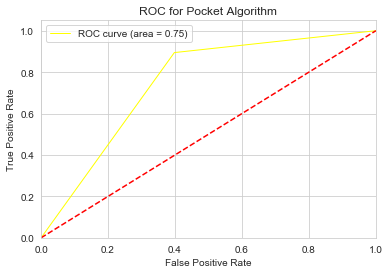

In [759]:
# AUC Curve 
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(predicted_target_test, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='yellow', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Pocket Algorithm')
plt.legend(loc="upper left")
plt.show()

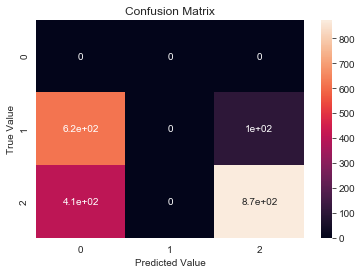

In [760]:
axis= plt.subplot()
sns.heatmap(conf_matrix, annot=True, ax = axis); 

axis.set_xlabel('Predicted Value');
axis.set_ylabel('True Value'); 
axis.set_title('Confusion Matrix');

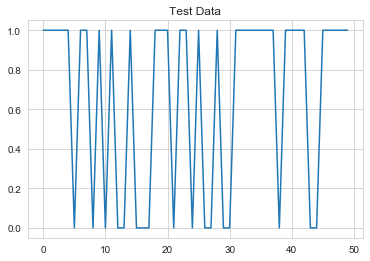

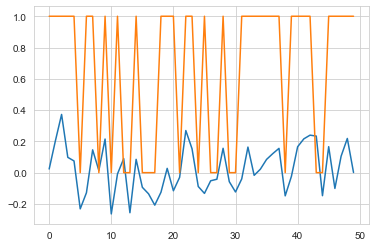

In [761]:
plt.title("Test Data")
plt.plot(y_test[0:50])
plt.show()
plt.plot(ypred_test[0:50])
plt.plot(y_test[0:50])
plt.show()

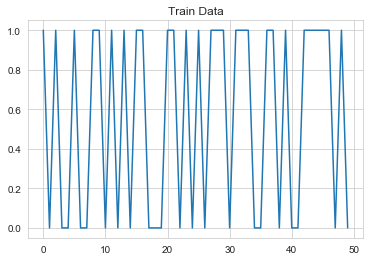

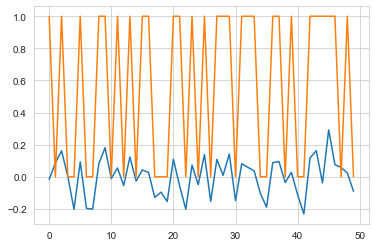

In [762]:
plt.title("Train Data")
plt.plot(y_train[0:50])
plt.show()
plt.plot(ypred_train[0:50])
plt.plot(y_train[0:50])
plt.show()

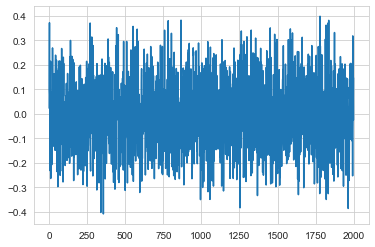

In [763]:
Y = pocket.use(X_test)
plt.plot(Y)

## 2.QDA

In [764]:
# Reading the data frame and separating the predicatable attribtue and dividing into training and test datasets
X=energy_df
y=energy['stabf'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [765]:
X_train.shape

(8000, 12)

In [766]:
y_train.shape

(8000,)

In [767]:
# Filtering Training data,normalizing it and the dividing it into on 0 and 1 binary classification 
qda = QDA()
Xtrain_normalized = qda.normalize(X_train)
X_0 = Xtrain_normalized[y_train==0]
X_1 = Xtrain_normalized[y_train==1]

In [768]:
qda.train(X_0,X_1)

In [769]:
X_0.shape

(2900, 12)

In [770]:
X_1.shape

(5100, 12)

### Dividing the training and test dataset into pred_train, true_train, pred_test, true_test

In [771]:
a,b = qda.use(X_train)
X_train=[]
for i in range(a.size):
    if a[i] > b[i]:
        X_train.append(0)
    else:
        X_train.append(1)
pred_train = np.array(X_train)
true_train = np.array(y_train)

F:\sreekar\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.


In [772]:
print('Training Data Accuracy:', accuracy_score(true_train,pred_train))

Training Data Accuracy: 0.6375


In [773]:
print('F1 score:', f1_score(true_train,pred_train))

F1 score: 0.7786259541984732


In [774]:
c,d = qda.use(X_test)

F:\sreekar\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.


In [775]:
X_test=[]
for i in range(c.size):
    if c[i] > d[i]:
        X_test.append(0)
    else:
        X_test.append(1)

pred_test = np.array(X_test)
true_test = np.array(y_test)

In [776]:
print('Accuracy:', accuracy_score(true_test,pred_test))

Accuracy: 0.64


In [777]:
print('F1 score:', f1_score(true_test,pred_test))

F1 score: 0.7804878048780487


In [778]:
# Confusion Matrix
conf_matrix = confusion_matrix(true_test,pred_test)
conf_matrix

array([[   0,  720],
       [   0, 1280]], dtype=int64)

In [779]:
# TP : True Positives, TN = True Negatives, FN = False Negatives, FP = False Positives
TP=conf_matrix[1][1]
TN=conf_matrix[0][0]
FN=conf_matrix[1][0]
FP=conf_matrix[0][1]

In [780]:
#Precision
TP/((TP+FP))

0.64

In [781]:
#Recall
TP/((TP+FN))

1.0

In [782]:
#Error
(FP+FN)/((TP+FP+TN+FN))

0.36

In [783]:
#Specificity
TN/((TN+FP))

0.0

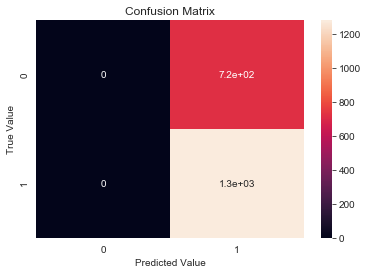

In [784]:
axis= plt.subplot()
sns.heatmap(conf_matrix, annot=True, ax = axis); 

axis.set_xlabel('Predicted Value');
axis.set_ylabel('True Value'); 
axis.set_title('Confusion Matrix');

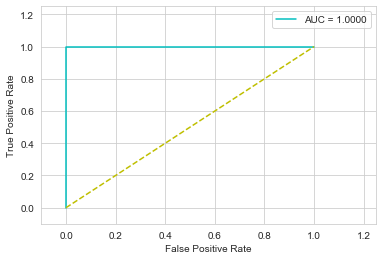

In [785]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test[:10000], true_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate, 'c',
label='AUC = %0.4f'% roc_auc)
plt.legend(loc='upper right')
plt.plot([0,1],[0,1],'y--')
plt.xlim([-0.1,1.25])
plt.ylim([-0.1,1.25])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

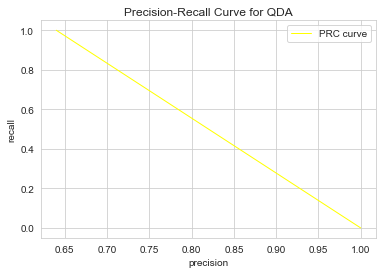

In [786]:
# Precision-Recall Curve 
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(true_test, pred_test)
plt.figure()
plt.plot(precision, recall, color='yellow', lw=1, label='PRC curve')
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision-Recall Curve for QDA')
plt.legend(loc="upper right")
plt.show()

F:\sreekar\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.
F:\sreekar\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  app.launch_new_instance()


Text(0.5, 0.92, 'QDA Discriminant Functions')

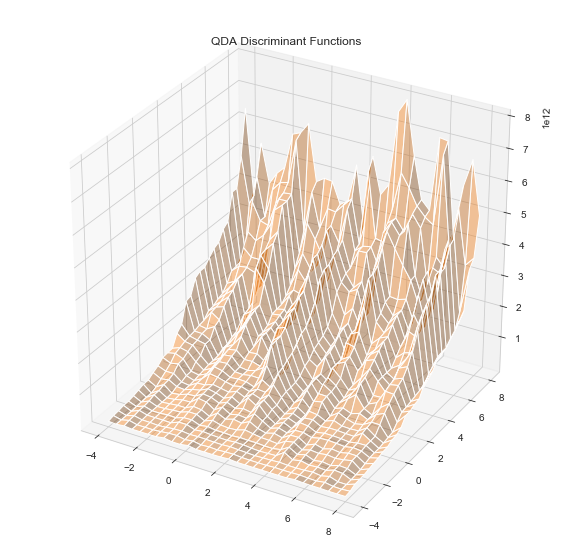

In [787]:
X=energy_df
y=energy['stabf'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
qda = QDA()
# Normalizing Training data
X_train_norm = qda.normalize(X_train)
# Filtering Training records based on Target Labels (0,1)
X_0 = X_train_norm[y_train==0]
X_1 = X_train_norm[y_train==1]
qda.train(X_0,X_1)
from mpl_toolkits.mplot3d import Axes3D
d1,d2 = qda.use(X_test[:900]) 
xs, ys = np.meshgrid(np.linspace(-4,8, 30), np.linspace(-4,8, 30))
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, np.sort(-1 *d1.reshape(xs.shape),0), alpha=0.2)
ax.plot_surface(xs, ys, np.sort(-1 *d2.reshape(xs.shape),0), alpha=0.4)
plt.title("QDA Discriminant Functions")

F:\sreekar\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


Text(0.5, 1.0, 'Decision Boundary')

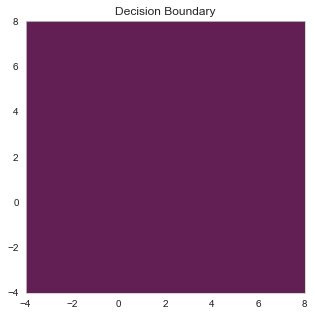

In [788]:
plt.figure(figsize=(5,5))
plt.contourf(xs, ys, ((d1-d2) > 0).reshape(xs.shape))
plt.title("Decision Boundary")

## LDA

In [789]:
# Reading the data frame and separating the predicatable attribtue and dividing into training and test datasets
X=energy_df
y=energy['stabf'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [790]:
# Filtering Training data,normalizing it and the dividing it into on 0 and 1 binary classification 
lda = LDA()
Xtrain_normalized = qda.normalize(X_train)
X_0_lda = Xtrain_normalized[y_train==0]
X_1_lda = Xtrain_normalized[y_train==1]

In [791]:
# Applying Training Data to train the LDA model
lda.train(X_0_lda,X_1_lda)

In [792]:
# Testing with Training Data
e,f = lda.use(X_train)
lda_train=[]
for i in range(e.size):
    if e[i] > f[i]:
        lda_train.append(0)
    else:
        lda_train.append(1)

pred_train = np.array(lda_train)
true_train = np.array(y_train)

In [793]:
print('Training Data Accuracy:', accuracy_score(true_train,pred_train))

Training Data Accuracy: 0.810375


In [794]:
# Testing with Test Data
g,h = lda.use(X_test)
lda_test=[]
for i in range(g.size):
    if g[i] > h[i]:
        lda_test.append(0)
    else:
        lda_test.append(1)

pred_test = np.array(lda_test)
true_test = np.array(y_test)

In [795]:
print('Test Data Accuracy:', accuracy_score(true_test,pred_test))

Test Data Accuracy: 0.8185


In [796]:
print('F1 score:', f1_score(true_train,pred_train))

F1 score: 0.8608129186163868


In [797]:
print('F1 score:', f1_score(true_test,pred_test))

F1 score: 0.866101069715972


In [798]:
# Confusion matrix
conf_matrix = confusion_matrix(true_test,pred_test)
conf_matrix

array([[ 463,  257],
       [ 106, 1174]], dtype=int64)

In [799]:
# TP : True Positive, TN = True Negative, FN = False Negative, FP = False Positive
TP=conf_matrix[1][1]
TN=conf_matrix[0][0]
FN=conf_matrix[1][0]
FP=conf_matrix[0][1]

In [800]:
#Precision
TP/((TP+FP))

0.8204053109713487

In [801]:
#recall
TP/((TP+FN))

0.9171875

In [802]:
#Error
(FP+FN)/((TP+FP+TN+FN))

0.1815

In [803]:
#Specificity
TN/((TN+FP))

0.6430555555555556

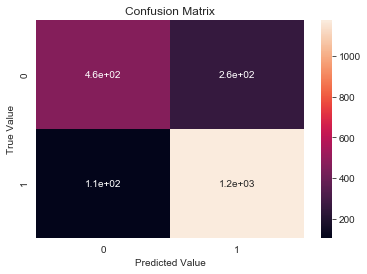

In [804]:
axis= plt.subplot()
sns.heatmap(conf_matrix, annot=True, ax = axis); 

axis.set_xlabel('Predicted Value');
axis.set_ylabel('True Value'); 
axis.set_title('Confusion Matrix');

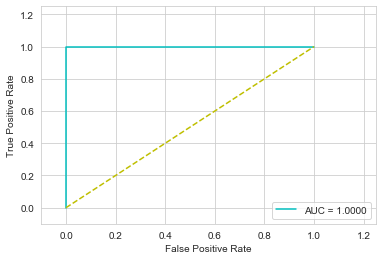

In [805]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test[:10000], true_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate, 'c',
label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'y--')
plt.xlim([-0.1,1.25])
plt.ylim([-0.1,1.25])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

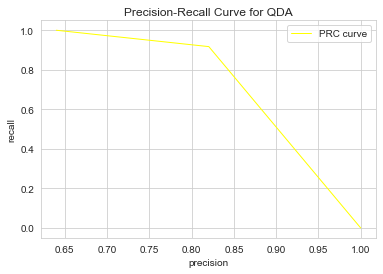

In [806]:
# Precision-Recall Curve 
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(true_test, pred_test)
plt.figure()
plt.plot(precision, recall, color='yellow', lw=1, label='PRC curve')
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision-Recall Curve for QDA')
plt.legend(loc="upper right")
plt.show()

Text(0.5, 0.92, 'LDA Discriminant Functions')

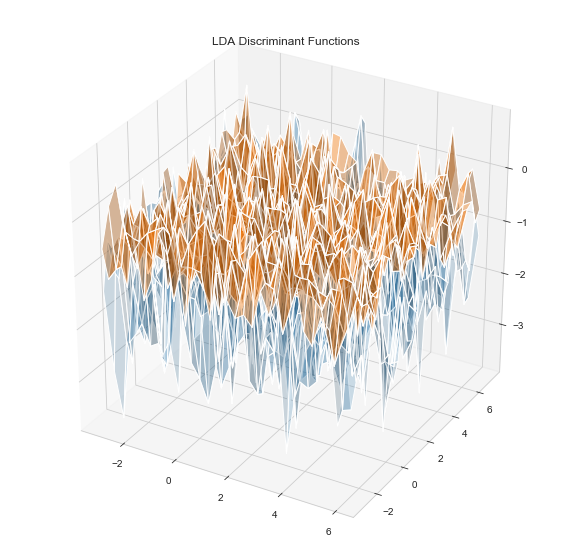

In [807]:
# LDA Discriminant Functions
d11,d12 = lda.use(X_test[0:900])
from mpl_toolkits.mplot3d import Axes3D
xs, ys = np.meshgrid(np.linspace(-3,6, 30), np.linspace(-3,7, 30))
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, d11.reshape(xs.shape), alpha=0.2)
ax.plot_surface(xs, ys, d12.reshape(xs.shape), alpha=0.4)
plt.title("LDA Discriminant Functions")

Text(0.5, 1.0, 'Decision Boundary')

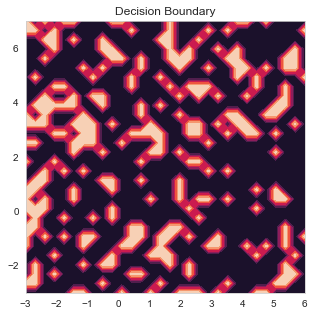

In [808]:
plt.figure(figsize=(5,5))
plt.contourf(xs, ys, ((d11-d12) > 0).reshape(xs.shape))
plt.title("Decision Boundary")

## Logistic Regression

In [809]:
# Reading the data frame and separating the predicatable attribtue and dividing into training and test datasets
X=energy_df
y=energy['stabf'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [810]:
# Filtering Training data,normalizing it and the dividing it into on 0 and 1 binary classification 
logreg = LogReg(0.0000001)
logreg.train(X_train, y_train)

In [811]:
X_train = logreg.use(X_train)
log_0 =  X_train[:,0]
log_1 = X_train[:,1]
X_logreg = []
for i in range(log_0.shape[0]):
    if log_0[i] > log_1[i]:
        X_logreg.append(0)
    else:
        X_logreg.append(1)
X_logreg_t = np.array(X_logreg)
true_values_t = np.array(y_train)

In [812]:
print(' Training Data Accuracy:', accuracy_score(true_values_t,X_logreg_t))

 Training Data Accuracy: 0.6375


In [813]:
# Testing with Test Data
X_test_log = logreg.use(X_test)
log_t_0 = X_test_log[:,0]
log_t_1 = X_test_log[:,1]
X_test_log = []
for i in range(log_t_0.shape[0]):
    if log_t_0[i] > log_t_1[i]:
        X_test_log.append(0)
    else:
        X_test_log.append(1)
X_test_log = np.array(X_test_log)
true_values = np.array(y_test)

In [814]:
print('Test Data Accuracy:', accuracy_score(true_values,X_test_log))

Test Data Accuracy: 0.64


In [815]:
print('F1 score:', f1_score(true_values_t,X_logreg_t))

F1 score: 0.7786259541984732


In [816]:
print('F1 score:', f1_score(true_values,X_test_log))

F1 score: 0.7804878048780487


In [817]:
conf_matrix = confusion_matrix(true_values,X_test_log)
conf_matrix

array([[   0,  720],
       [   0, 1280]], dtype=int64)

In [818]:
#Precision
TP/((TP+FP))

0.8204053109713487

In [819]:
#Recall
TP/((TP+FN))

0.9171875

In [820]:
#Error
(FP+FN)/((TP+FP+TN+FN))

0.1815

In [821]:
#Specificity
TN/((TN+FP))

0.6430555555555556

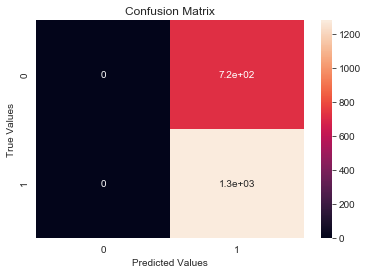

In [822]:
axis= plt.subplot()
sns.heatmap(conf_matrix, annot=True, ax = axis); 

axis.set_xlabel('Predicted Values');
axis.set_ylabel('True Values'); 
axis.set_title('Confusion Matrix');

F:\sreekar\lib\site-packages\sklearn\metrics\_ranking.py:800: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
F:\sreekar\lib\site-packages\sklearn\metrics\_ranking.py:88: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):


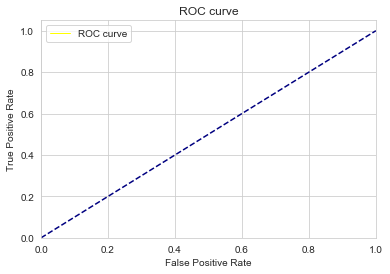

In [823]:
# AUC Curve 
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(X_test_log, true_values)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='yellow', lw=1, label='ROC curve' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="upper left")
plt.show()

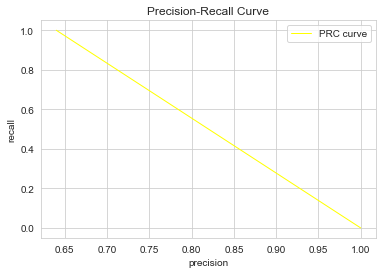

In [824]:
# Precision-Recall Curve for Logistic Regression
precision, recall, thresholds = precision_recall_curve(true_values, X_test_log)
plt.figure()
plt.plot(precision, recall, color='yellow', lw=1, label='PRC curve')
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()

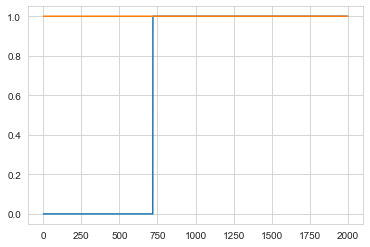

In [825]:
plt.plot(np.sort(true_values,0))
plt.plot(np.sort(X_test_log,0))

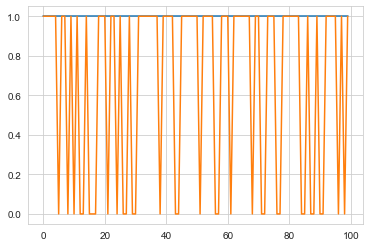

In [826]:
plt.plot(X_test_log[0:100])
plt.plot(true_values[0:100])

### Discussion about evaluation metrics

Evaluation of machine learning algorithm is very essential before it is used in real world, for that purpose to test it we have a set of classification measurements:

<b>Accuracy:</b> It is the ratio of number of correct predictions to the total number of input samples.
<br><br>
<b>F1 Score:</b> F1 Score is the Harmonic Mean between precision and recall. The range for F1 Score is [0, 1]. It tells you how precise your classifier is (how many instances it classifies correctly), as well as how robust it is (it does not miss a significant number of instances).
<br><br>
<b>Confusion Matrix:</b> Confusion Matrix as the name suggests gives us a matrix as output and describes the complete performance of the model. Here, each row represents the predictions from model and column represents the actual classes. 
<br><br>
<b>Precision:</b> The accuracy of positive predictions. We can read this as the ratio that my positive prediction is correct.
<br>
$ Precision = \frac{TP}{TP+FP}$
<br><br>
<b>Recall:</b> Recall gives the total amount of relevant values actually retrieved.
<br>
$ Recall = \frac{TP}{TP+FN}$
<br><br>
**Specificity** (True Negative Rate): Considering imblance or difference in class, we consider TNR as well. 

$$
\text{Specificity} = \frac{\text{TN}}{\text{TN} + \text{FP}}
$$
<br><br>
<b>Area Under Curve(AUC):</b> Area Under Curve(AUC) is one of the most widely used metrics for evaluation. It is used for binary classification problem. AUC of a classifier is equal to the probability that the classifier will rank a randomly chosen positive example higher than a randomly chosen negative example.
<br>

The Error and sepcificity of our models is as follows:<br>
Algorithm Type | Error | Specificity<br>
____________________________________
Pocket | 0.1815 | 0.6430555556<br>
____________________________________
QDA | 0.36 | 0<br>
____________________________________
LDA | 0.1815 | 0.6430555556<br>
____________________________________
Logistic regression | 0.1815 | 0.6430555556<br>

## Discussion about train and test accuracies

### Pocket Algorithm

Train data:

Accuracy : 0.45225<br>
F1 Score : 0.79229169
<br><br>

Test Data: <br><br>

Accuracy : 0.436<br>
F1 Score : 0.77339246
<br><br>

Precision & Recall:<br><br>
Precision : 0.820405311<br>
Recall : 0.9171875

Pocket algorithm is giving accuracy of 45% on train and 43% on test, which implied predicted variable would be roughly 46% accurate of what it should have been. It is not overfitting. Recall is nearly 1. Stable or unstable connection would be 46% correct using this algorithm.


### QDA

Train data:<br><br>

Accuracy : 0.6375<br>
F1 Score : 0.7786259542
<br><br>

Test Data: <br><br>

Accuracy : 0.64<br>
F1 Score : 0.7804878049
<br><br>

Precision & Recall:<br><br>
Precision : 0.64<br>
Recall : 1

QDA algorithm is giving accuracy of 63% on train and 64% on test, which implied predicted variable would be roughly 65% accurate of what it should have been. It is not overfitting. Recall is 1. Precision is 64%. Stable or unstable connection would be 64% correct using this algorithm.<br><br>

### LDA

Train data:<br><br>

Accuracy : 0.7526550941185087<br>
F1 Score : 0.8588741694178611
<br><br>

Test Data: <br><br>

Accuracy : 0.8185<br>
F1 Score : 0.8661010697
<br><br>

Precision & Recall:<br><br>
Precision : 0.820405311<br>
Recall : 0.9171875

LDA algorithm is giving accuracy of 75% on train and 81% on test, which implied predicted variable would be roughly 81% accurate of what it should have been. It is not overfitting and has good accuracy. Recall is 91%. Precision is 82% Both are decent values. Stable or unstable connection would be 82% correct using this algorithm.<br><br>

### Logistic Regression

Train data:<br><br>

Accuracy : 0.6375<br>
F1 Score : 0.7786259542
<br><br>

Test Data: <br><br>

Accuracy : 0.64<br>
F1 Score : 0.7804878049
<br><br>

Precision & Recall:<br><br>
Precision : 0.820405311<br>
Recall : 0.9171875

Logistic algorithm is giving accuracy of 63% on train and 64% on test, which implied predicted variable would be roughly 64% accurate of what it should have been. It is not overfitting and has good accuracy. Recall is 91%. Precision is 82% Both are decent values. Stable or unstable connection would be 82% correct using this algorithm.<br><br>

## Discussions about classification model comparison

Upon comparison it can be noticed that all the algorithms perofmance on test and train data have been consistent and data did not underfit or overfit. All though accuracies have been equal in few scenarios. 

Pocket algorithm is giving accuracy of 45% on train and 43% on test, which implied predicted variable would be roughly 46% accurate of what it should have been. It is not overfitting. Recall is nearly 1. Stable or unstable connection would be 46% correct using this algorithm. 

QDA algorithm is giving accuracy of 63% on train and 64% on test, which implied predicted variable would be roughly 65% accurate of what it should have been. It is not overfitting. Recall is 1. Precision is 64%. Stable or unstable connection would be 64% correct using this algorithm. 

LDA algorithm is giving accuracy of 75% on train and 81% on test, which implied predicted variable would be roughly 81% accurate of what it should have been. It is not overfitting and has good accuracy. Recall is 91%. Precision is 82% Both are decent values. Stable or unstable connection would be 82% correct using this algorithm. 

Logistic algorithm is giving accuracy of 63% on train and 64% on test, which implied predicted variable would be roughly 64% accurate of what it should have been. It is not overfitting and has good accuracy. Recall is 91%. Precision is 82% Both are decent values. Stable or unstable connection would be 82% correct using this algorithm.

The following table summarises all the training/test accuracy,error and precision

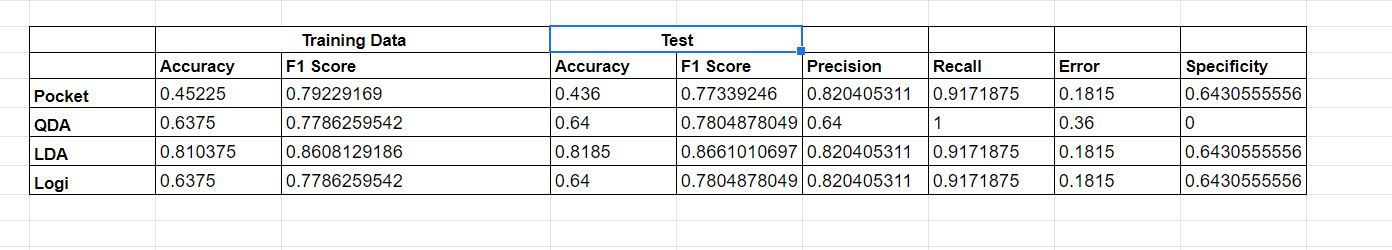

In [827]:
from IPython.display import Image
Image("summary.JPG")

You can use logistic regression to build a perceptron. The logistic regression uses logistic function to build the output from a given inputs. Logistic function produces a smooth output between 0 and 1, so you need one more thing to make it a classifier, which is a threshold. Perceptrons can be built with other functional forms, of course, not just logistic.

This is the major difference between pocket algorithm and logistic regression


Both LDA and logistic regression produce linear decision boundaries so when the true decision boundaries are linear, then the LDA and logistic regression approaches will tend to perform well. QDA, on the other-hand, provides a non-linear quadratic decision boundary. Thus, when the decision boundary is moderately non-linear, QDA may give better results.

LDA (Linear Discriminant Analysis) is used when a linear boundary is required between classifiers and QDA (Quadratic Discriminant Analysis) is used to find a non-linear boundary between classifiers. LDA and QDA work better when the response classes are separable and distribution of X=x for all class is normal. The more the classes are separable and the more the distribution is normal, the better will be the classification result for LDA and QDA.

# Conclusions

In this assignment, I have implemented pocket algorithm, QDA algorithm, LDA algorithm and logistic regression to find out if a connection is stable or not. I have pre processed the data and applied the algorithms individually and evaluated it and computed metrics for them. I have  plotted graphs for better understanding of the data.

Upon analysis, I have found out that LDA algorithm is the best algorithm for my data as it's accuracy for test and train data is 81% and above. F1 score is 86%. Precision is 82%, recall is 91%, error rate is as less as 0.1 and specificity is 64%. 

The challenges which I have faced were, I have encountered value errors, alg errors and boradcasting errors, although the concept is simple to understand, implementing it is altogether a different ball game. I have learned how the four algorithms function and which might be better to choose. 

Math errors were hard to debug. But, once I have started breaking it down to pieces, it solved my issue.

# References

1. Arzamasov Vadim, “UCI Machine Learning Repository: Electrical Grid Stability Simulated Data
Set.” Archive.Ics.Uci.Edu, https://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+. Accessed 20 Sept.2020.
2. “Pandas.DataFrame.Plot — Pandas 1.1.2 Documentation.” Pandas.Pydata.Org,https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html. Accessed 09 October 2020.
3. "Visualizing distributions of Data using seaborn."seaborn.pydata.org, https://seaborn.pydata.org/tutorial/distributions.html. Accessed 25 October 2020
4. "numpy.array." Numpy.org, https://numpy.org/doc/stable/reference/generated/numpy.array.html. Accessed 09 October 2020.
5. "Packages" docs.python.org, https://docs.python.org/3/tutorial/modules.html. Accessed 09 October 2020.
6. "least square error." en.wikipedia.org, https://en.wikipedia.org/wiki/Mean_squared_error. Accessed 09 October 2020.
7. Zulaikha Lateef, "Minimizing error." edureka.co, https://www.edureka.co/blog/least-square-regression/#:~:text=The%20least%20squares%20regression%20method%20works%20by%20minimizing%20the%20sum,the%20least%20squares%20regression%20method.Accessed 25 October 2020.
8. ImportanceOfBeingErnest. "Type Error ufunc Multiply." 26 April 2017, https://stackoverflow.com/questions/42013903/typeerror-ufunc-multiply-did-not-contain-a-loop-with-signature-matching-types. Accessed 26 October 2020.
9. Kumar Paritosh, "Computational Complexity of ML Models." https://medium.com/@paritoshkumar_5426/time-complexity-of-ml-models-4ec39fad2770#:~:text=Knowing%20the%20Computational%20complexity%20is%20very%20important%20in%20Machine%20Learning.&text=Time%20complexity%20can%20be%20seen,perform%20for%20the%20input%20size.&text=Time%20is%20linear%20with%20respect,)%20and%20dimensions%20(d). Accessed 26 October 2020.
10. Andree, "Computational complexity of least square regression operation." 22 November 2011, "https://math.stackexchange.com/questions/84495/computational-complexity-of-least-square-regression-operation." Accessed 26 October 2020.
11. Shun Huang, "Machine Learning Basics: Pocket Learning Algorithm and Basic Feature Engineering." 12 February 2018, "https://www.codeproject.com/Articles/1229772/Machine-Learning-Basics-Pocket-Learning-Algorithm#:~:text=The%20idea%20is%20straightforward%3A%20this,is%20called%20Pocket%20Learning%20Algorithm).&text=At%20the%20end%20of%20the,rather%20than%20the%20last%20solution." Accessed 26 October 2020.
12. Matthias Döring, "Linear, Quadratic, and Regularized Discriminant Analysis." 30 November 2018, "https://www.datascienceblog.net/post/machine-learning/linear-discriminant-analysis/." Accessed 27 October 2020.

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes.

To help our TA's grading, please make an explicit section for each grading criteria. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 



points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
15 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
25 | Methods | 
 |10| Summary of Classification models
 | 5| Explanation of codes
 |10| Pocket, LDA, QDA, Logistic Regression
40 | Experiments 
| 5| Discussion about evaluation metrics
| 5| Discussion about train and test accuracies
|20| plots for results (5 for each algorithm)
|10| Discussions about classificaion model comparison
5 | |Conclusions 
5 | |Referemces
5 | |Grammar and spelling error (Proofread please)